<a href="https://colab.research.google.com/github/kavmut/Algorithmic-Trading-Strategy-Bot-Using-MACD-Python-/blob/master/Algorithmic_Trading_Strategy_Bot_(Using_MACD_%26_Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses the Moving Average Convergance/Divergance (MACD) crossover
#              to determine when to buy and sell stock

In [ ]:
# Import the libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
# Store the data into a df
df = pd.read_csv('AAPL.csv')
# Set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Show the Data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-05-22,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800
2020-05-26,2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500
2020-05-27,2020-05-27,316.140015,318.709991,313.089996,318.109985,318.109985,28236300
2020-05-28,2020-05-28,316.769989,323.440002,315.630005,318.250000,318.250000,33390200
2020-05-29,2020-05-29,319.250000,321.149994,316.470001,317.940002,317.940002,38399500
2020-06-01,2020-06-01,317.750000,322.350006,317.209991,321.850006,321.850006,20197800
2020-06-02,2020-06-02,320.750000,323.440002,318.929993,323.339996,323.339996,21910700
2020-06-03,2020-06-03,324.660004,326.200012,322.299988,325.119995,325.119995,26122800
2020-06-04,2020-06-04,324.390015,325.619995,320.779999,322.320007,322.320007,21890100
2020-06-05,2020-06-05,323.350006,331.750000,323.230011,331.500000,331.500000,34312600


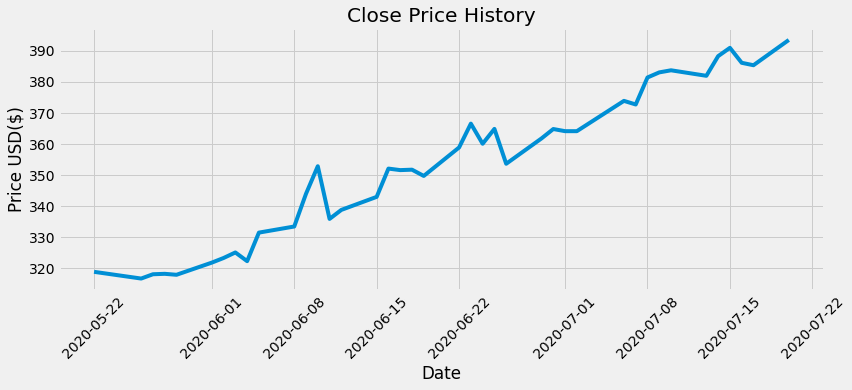

In [ ]:
# Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD($)')
plt.show()

In [ ]:
# Calculate the MACD and signal line indicators
# Calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
# Calculate the MACD line
MACD = ShortEMA - LongEMA
# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()


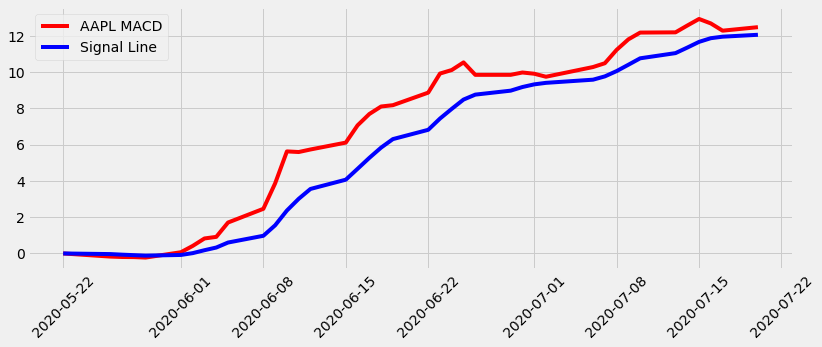

In [ ]:
# Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'AAPL MACD', color= 'red')
plt.plot(df.index, signal, label='Signal Line', color= 'blue')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
# Show the Data
df



,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2020-05-22,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800,0.000000,0.000000
2020-05-26,2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500,-0.172308,-0.034462
2020-05-27,2020-05-27,316.140015,318.709991,313.089996,318.109985,318.109985,28236300,-0.195260,-0.066621
2020-05-28,2020-05-28,316.769989,323.440002,315.630005,318.250000,318.250000,33390200,-0.199848,-0.093267
2020-05-29,2020-05-29,319.250000,321.149994,316.470001,317.940002,317.940002,38399500,-0.225894,-0.119792
2020-06-01,2020-06-01,317.750000,322.350006,317.209991,321.850006,321.850006,20197800,0.068182,-0.082197
2020-06-02,2020-06-02,320.750000,323.440002,318.929993,323.339996,323.339996,21910700,0.416667,0.017576
2020-06-03,2020-06-03,324.660004,326.200012,322.299988,325.119995,325.119995,26122800,0.826942,0.179449
2020-06-04,2020-06-04,324.390015,325.619995,320.779999,322.320007,322.320007,21890100,0.915598,0.326679
2020-06-05,2020-06-05,323.350006,331.750000,323.230011,331.500000,331.500000,34312600,1.706931,0.602729


In [ ]:
# Create a function to signal to buy and sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Sell, Buy)

        
        

In [ ]:
# Create buy and sell column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]



In [ ]:
# Show the Data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2020-05-22,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800,0.000000,0.000000,NaN,NaN
2020-05-26,2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500,-0.172308,-0.034462,316.730011,NaN
2020-05-27,2020-05-27,316.140015,318.709991,313.089996,318.109985,318.109985,28236300,-0.195260,-0.066621,NaN,NaN
2020-05-28,2020-05-28,316.769989,323.440002,315.630005,318.250000,318.250000,33390200,-0.199848,-0.093267,NaN,NaN
2020-05-29,2020-05-29,319.250000,321.149994,316.470001,317.940002,317.940002,38399500,-0.225894,-0.119792,NaN,NaN
2020-06-01,2020-06-01,317.750000,322.350006,317.209991,321.850006,321.850006,20197800,0.068182,-0.082197,NaN,321.850006
2020-06-02,2020-06-02,320.750000,323.440002,318.929993,323.339996,323.339996,21910700,0.416667,0.017576,NaN,NaN
2020-06-03,2020-06-03,324.660004,326.200012,322.299988,325.119995,325.119995,26122800,0.826942,0.179449,NaN,NaN
2020-06-04,2020-06-04,324.390015,325.619995,320.779999,322.320007,322.320007,21890100,0.915598,0.326679,NaN,NaN
2020-06-05,2020-06-05,323.350006,331.750000,323.230011,331.500000,331.500000,34312600,1.706931,0.602729,NaN,NaN


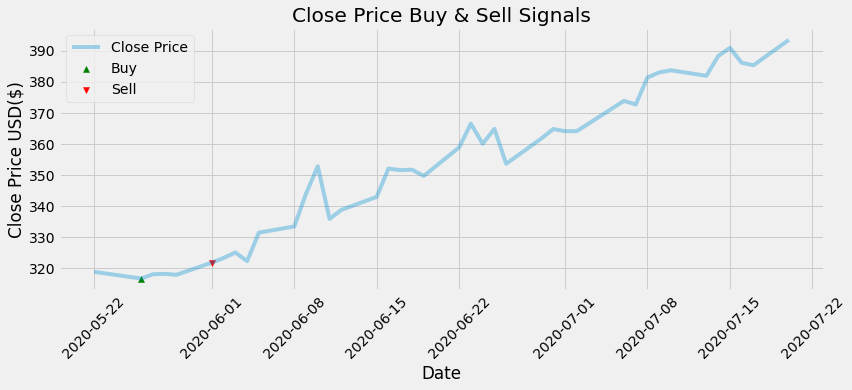

In [ ]:
# Visually show the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha =1)
plt.plot(df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc = 'upper left')
plt.show()